<a href="https://colab.research.google.com/github/BrokenShell/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


# Assignment

1. Generate and numerically represent a confidence interval

In [0]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 12

### Loading Data

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
voting_records = pd.read_csv(
    url, 
    header=None,
    names=[
        'party','handicapped-infants','water-project', 'budget',
        'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
        'anti-satellite-ban', 'aid-to-contras','mx-missile','immigration', 
        'synfuels', 'education', 'right-to-sue','crime','duty-free', 'south-africa',
    ],
)

### Splitting Data

In [0]:
df = voting_records.replace({'?':np.NaN, 'n':0, 'y':1})
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

## Confidence Interval

In [0]:
def confidence_interval(data, confidence = 0.95):
    """
    Calculates a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    @param data: Iterable. Sample observations
    @param confidence: Float, default = 0.95, confidence level for the interval
    @return: Tuple (lower bound, mean, upper bound)
    """
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)
    stderr = np.std(data, ddof=1) / np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return mean - moe, mean, mean + moe

In [30]:
coinflips = np.random.binomial(n=1, p=0.5, size=500)
confidence_interval(coinflips, confidence=0.95)

(0.44004583837878186, 0.484, 0.5279541616212181)

2. Graphically represent the confidence interval

In [0]:
import seaborn as sns

def plot_confidence_interval(data, confidence=0.95):
    sns.kdeplot(data)
    CI = confidence_interval(data, confidence)
    plt.axvline(x=CI[0], color='red')
    plt.axvline(x=CI[1], color='k')
    plt.axvline(x=CI[2], color='red')
    plt.show()

First Case: Binomial

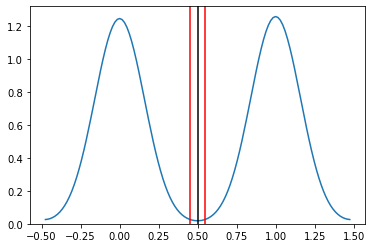

In [63]:
coinflips_42 = np.random.binomial(n=1, p=0.5, size=420)
plot_confidence_interval(coinflips_42)

Second Case: Standard Normal

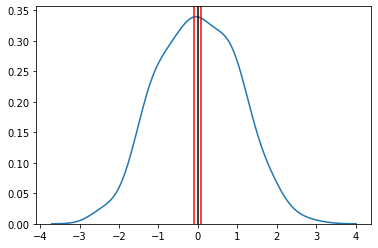

In [62]:
norm = np.random.normal(0, 1, size=500)
plot_confidence_interval(norm, confidence=0.95)

3. Interpret the confidence interval


### Confidence Interval Formula

\begin{equation*}
\large\bar{X}\pm t \frac{s}{\sqrt{n}}
\end{equation*}

$\bar{X}$ is the sample mean<br>
t is the tvalue<br>
s is the standard deviation<br>
n is the sample size

The Confidence Interval is the upper and lower bound of statistical significance for our t-test. It is a range of values so defined that there is a specified probability that the value of a parameter lies within it, in the first case above 0.5 is inside our Confidence Interval and therefore is likely (95% sure) the average. In the second case 0.0 is inside the CI.

# 4. Chi-squared tests:

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data.



In [0]:
adult_df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')

## By hand using Numpy

In [0]:
cut_points = [0, 9, 19, 29, 39, 49, 1000]
label_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']
adult_df['hours_per_week_categories'] = pd.cut(adult_df['hours-per-week'], cut_points, labels=label_names)

In [34]:
observed_totals = pd.crosstab(
    adult_df['sex'], adult_df['hours_per_week_categories'], margins=True)
observed_totals

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


In [35]:
observed = pd.crosstab(adult_df['sex'], adult_df['hours_per_week_categories']).values
print(observed.shape)
observed

(2, 6)


array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]])

In [0]:
total = adult_df.shape[0]

In [37]:
row_sums = observed_totals.iloc[0:2, 6].values
print(row_sums)
col_sums = observed_totals.iloc[2, 0:6].values
print(col_sums)

[10771 21790]
[  458  1246  2392  3667 18336  6462]


In [38]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_value = column * row_sums[i] / total
        expected_row.append(expected_value)
    expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  151.50388502   412.16995793   791.26046497  1213.02346365
   6065.44811277  2137.59411566]
 [  306.49611498   833.83004207  1600.73953503  2453.97653635
  12270.55188723  4324.40588434]]


In [39]:
def chi2(observed, expected):
    return ((observed - expected)**2 / (expected)).sum()

print(f"chi_squared: {chi2(observed, expected)}")

chi_squared: 2287.190943926107


## In a single line using Scipy


In [40]:
sp_chi_squared, sp_p_value, sp_dof, sp_expected = stats.chi2_contingency(observed)

print(f"chi_squared: {sp_chi_squared}\n")
print(f"expected female: {np.array(list(map(int, sp_expected[0])))}")
print(f"observed female: {observed[0]}\n")
print(f"expected male: {np.array(list(map(int, sp_expected[1])))}")
print(f"observed male: {observed[1]}\n")

chi_squared: 2287.190943926107

expected female: [ 151  412  791 1213 6065 2137]
observed female: [ 235  671 1287 1914 5636 1028]

expected male: [  306   833  1600  2453 12270  4324]
observed male: [  223   575  1105  1753 12700  5434]



## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).

### Rejecting the Null Hypothesis: that males and females work the same number of hours. 
There is a much higher proportion of men in the top two categories, and there are more females in the lower two categories. However, this study doesn't take into account many factors that may bias this result... 

It would be wise not to assume too much. For example, it may be the case that women are typically not given the opportunity to work long hours, or it may mean they typically don't want to work longer hours. The data is moot on this point. 

It would be a disservice to our industry to conclude from this study that women are somehow lazier than men altho I can see how a lazy journalist might use this data to support an inflammatory article. Women are clearly superior in almost every way. And the only reason this statement doesn't seem *neutral*, is that women have been marginalized by the patriarch for centuries.

2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

### (see below)

3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

### Created a few functions:
- `plot_confidence_interval()`
- `chi2()`

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

# Personal Project

## Monster Data
### Tier vs. AC
Null Hypothesis: AC is random and not correlated to the Tier.

In [0]:
import altair as alt

In [0]:
monsters = pd.read_csv('https://sharpdesigndigital.com/monsters.csv')

Monster Stats:
- CR: Challenge Rating
- AC: Armor Class
- HP: Hit Points
- ATT: Attack Bonus
- DAM: Typical Damage (average)
- Tier: Grouped CR

In [43]:
monsters.head()

,Monster Name,CR,AC,HP,ATT,DAM,Tier
0,"Elder Vampire, Gnome",16,19,299,8,106,4
1,Gelatinous Sphere,9,16,196,7,58,2
2,Tasmanian Devil,-3,8,3,0,1,0
3,Crawling Claw,-1,10,42,2,4,0
4,Mummy,17,18,316,10,104,4


In [44]:
for col in ['Tier', 'AC']:
    print(f"Monster {col} Totals \n{monsters[col].value_counts().sort_index()}\n")

Monster Tier Totals 
0    1118
1    1157
2     973
3     776
4     544
5     325
6     107
Name: Tier, dtype: int64

Monster AC Totals 
8     289
9     271
10    306
11    501
12    233
13    238
14    491
15    367
16    485
17    489
18    484
19    405
20    201
21    132
22     75
23     21
24      7
25      3
26      2
Name: AC, dtype: int64



In [45]:
alt.Chart(monsters, title="Monsters").mark_point().encode(
    x='AC:O',
    y='Tier:Q',
    color='Tier:N'
).properties(width=400, height=200)

alt.Chart(...)

In [0]:
obs = pd.crosstab(monsters['Tier'], monsters['AC']).values

In [52]:
monsters_chi_squared, _, _, monsters_expected = stats.chi2_contingency(obs)
print(f"chi_squared Tier vs. AC: {monsters_chi_squared:.2f}\n")
print("Tier vs. AC\n")
for i in range(7):
    print(f"Data Tier {i}")
    print("Expected:", *list(map(int, monsters_expected[i])), sep='\t')
    print("Observed:", *obs[i], sep='\t')
    print()

chi_squared Tier vs. AC: 13294.50

Tier vs. AC

Data Tier 0
Expected:	64	60	68	112	52	53	109	82	108	109	108	90	44	29	16	4	1	0	0
Observed:	289	271	289	269	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0

Data Tier 1
Expected:	66	62	70	115	53	55	113	84	112	113	111	93	46	30	17	4	1	0	0
Observed:	0	0	17	232	233	235	410	30	0	0	0	0	0	0	0	0	0	0	0

Data Tier 2
Expected:	56	52	59	97	45	46	95	71	94	95	94	78	39	25	14	4	1	0	0
Observed:	0	0	0	0	0	3	78	319	349	190	32	2	0	0	0	0	0	0	0

Data Tier 3
Expected:	44	42	47	77	36	36	76	56	75	75	75	62	31	20	11	3	1	0	0
Observed:	0	0	0	0	0	0	1	11	109	227	269	134	24	1	0	0	0	0	0

Data Tier 4
Expected:	31	29	33	54	25	25	53	39	52	53	52	44	21	14	8	2	0	0	0
Observed:	0	0	0	0	0	0	1	6	23	55	134	185	85	49	6	0	0	0	0

Data Tier 5
Expected:	18	17	19	32	15	15	31	23	31	31	31	26	13	8	4	1	0	0	0
Observed:	0	0	0	0	0	0	1	1	2	16	39	74	81	58	41	10	1	1	0

Data Tier 6
Expected:	6	5	6	10	4	5	10	7	10	10	10	8	4	2	1	0	0	0	0
Observed:	0	0	0	0	0	0	0	0	2	1	10	10	11	24	28	11	6	2	2



#### Rejecting the Null Hypothesis that all Tiers have about the same uniformly random AC. 
The chi_squared is huge: 13,295

Higher Tiers consistently have higher AC.

I created the data based on a well known game system. I'm intentionally studying data that I know well in order to clearly see how the math fits together. Obviously monster tier and stats are positively correlated and this supports my findings.

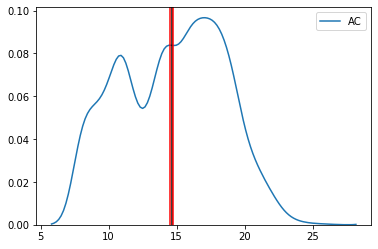

In [65]:
plot_confidence_interval(monsters['AC'], confidence=.95)

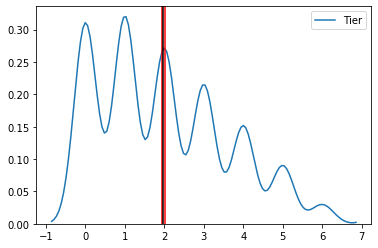

In [66]:
plot_confidence_interval(monsters['Tier'], confidence=.95)